


# Vamos encher o carrinho!

## Plano de solução

Verificar se os tipos de dados em cada coluna, identificar se há valores ausentes em qualquer coluna. Verificar se há linhas duplicadas nos dados e remover as duplicatas.

In [1]:
# Importe as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# leia os conjuntos de dados em DataFrames
orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products_df = pd.read_csv('/datasets/products.csv', sep=';')
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=';')
departments_df = pd.read_csv('/datasets/departments.csv', sep=';')
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# imprima as informações sobre o DataFrame
orders_df.info()
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [4]:
# imprima as informações sobre o DataFrame
products_df.info()
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [5]:
# imprima as informações sobre o DataFrame
aisles_df.info()
aisles_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [6]:
# imprima as informações sobre o DataFrame
departments_df.info()
departments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [7]:
# imprima as informações sobre o DataFrame
order_products_df.info()
order_products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


## Conclusões

 Há alguns valores ausentes em determinados dados, porém com uma análise mais profunda verificaremos para manter a integridade dos dados.


# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

 Verifica tipos de dados em cada coluna do DataFrames. Usarei o método 'isna()' para identificar valores ausentes, o método 'duplicated'() para conteúdos duplicados, o método 'drop_duplicates'() também para casos mais complexos. Basicamente este será o meu plano num panorama geral.

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `orders`

In [8]:
# Verifique e corrija os tipos de dados
orders_df.convert_dtypes(infer_objects = False).dtypes
orders_df['days_since_prior_order'] = orders_df['days_since_prior_order'].astype('Int64')
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478967 non-null  int64
 1   user_id                 478967 non-null  int64
 2   order_number            478967 non-null  int64
 3   order_dow               478967 non-null  int64
 4   order_hour_of_day       478967 non-null  int64
 5   days_since_prior_order  450148 non-null  Int64
dtypes: Int64(1), int64(5)
memory usage: 22.4 MB


In [9]:
# Verificar se há pedidos duplicado
orders_df[orders_df.duplicated(subset='order_id', keep=False)].sort_values('order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10
371905,391768,57671,19,3,2,10
119251,408114,68324,4,3,2,18
321100,408114,68324,4,3,2,18
394347,467134,63189,21,3,2,2
250626,467134,63189,21,3,2,2
99462,794638,50898,24,3,2,2
145574,794638,50898,24,3,2,2
311713,1021560,53767,3,3,2,9
242618,1021560,53767,3,3,2,9


In [10]:
## Checando por duplicados
orders_df['order_id'].duplicated().sum()
orders_df[orders_df['order_id'].duplicated(keep=False)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16
99462,794638,50898,24,3,2,2
119251,408114,68324,4,3,2,18
142258,2845099,31189,11,3,2,7
145574,794638,50898,24,3,2,2
164581,1112182,202304,84,3,2,6
200059,1782114,106752,1,3,2,<NA>
204042,2125197,14050,48,3,2,3
215294,2160484,107525,16,3,2,30
223105,2160484,107525,16,3,2,30


Sim. Têm o mesmo 'order_id', 'user_id', 'order_dow' e 'order_hour_of_day'. Isso representa entradas duplicadas no conjunto de dados.

In [11]:
# Com base nas suas conclusões,
# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras
filtered_orders = orders_df[(orders_df['order_hour_of_day'] == 2) & (orders_df['order_dow'] == 3)]
filtered_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16
5156,2190225,138285,18,3,2,11
15506,553049,58599,13,3,2,7
18420,382357,120200,19,3,2,11
24691,690242,77357,2,3,2,9
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30
458816,910166,164782,18,3,2,4
459635,1680532,106435,6,3,2,21
468324,222962,54979,59,3,2,3


Esses pedidos correspondem a uma situação em que os clientes fizeram compras especificativamente às 2 horas da manhã numa quarta-feira.

In [12]:
# Remova pedidos duplicados
orders_df.drop_duplicates(subset=['order_id'], keep=False, inplace=True)

In [13]:
# Verifique as linhas duplicadas mais uma vez
orders_df[orders_df.duplicated(subset='order_id' , keep=False)].sum()

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

In [14]:
# Verifique novamente apenas os IDs de pedidos duplicados
orders_df[orders_df['order_id'].duplicated(keep=False)].sum()

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

Removi os pedidos duplicados, em seguida fiz uma verificação por linha para ter a confirmação da remoção anterior e depois outra para IDs de pedidos duplicados. Medidas apropriadas para limpar e verificar a integridade dos dados após a remoção de pedidos duplicados.

### DataFrame `products`

In [15]:
# Verifique se há linhas completamente duplicadas
products_df.duplicated().sum()

0

In [16]:
# Verifique apenas se há IDs dos produtos duplicados
products_df.duplicated(subset='product_id', keep=False).sum()

0

In [17]:
# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
products_df['product_name'] = products_df['product_name'].str.lower()
products_df[products_df.duplicated(subset='product_name')]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [18]:
# Verifique os nomes de produtos duplicados que não estão faltando
products_df.drop_duplicates(subset=['product_name'], keep=False)

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49683,49684,vodka- triple distilled- twist of vanilla,124,5
49684,49685,en croute roast hazelnut cranberry,42,1
49685,49686,artisan baguette,112,3
49686,49687,smartblend healthy metabolism dry cat food,41,8


Não foram encontradas linhas completamente duplicadas no products_df; também não foram encontrados IDs de produtos duplicados.
Identifiquei nomes de produtos duplicados e optei por manter apenas a primeira ocorrência de cada nome.

### DataFrame `departments`

In [19]:
# Verifique se há linhas completamente duplicadas
departments_df.duplicated().sum()

0

In [20]:
# Verifique apenas se há IDs dos produtos duplicados
departments_df['department_id'].duplicated()
print(departments_df)

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


 Ate o momento verificamos se há duplicatas com os IDs de pedidos.

### DataFrame `aisles`

In [21]:
# Verifique se há linhas completamente duplicadas
aisles_df.duplicated().sum()

0

In [22]:
# Verifique apenas se há IDs dos produtos duplicados
aisles_df['aisle_id'].duplicated()
aisles_df

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


Não há linhas duplicadas, e de existem 134 entradas na sessão.

### DataFrame `order_products`

In [23]:
# Verifique se há linhas completamente duplicadas
order_products_df.duplicated().sum()

0

In [24]:
# Verifique mais uma vez se há outros casos complicados de duplicados
products_df['product_name'].unique()

array(['chocolate sandwich cookies', 'all-seasons salt',
       'robust golden unsweetened oolong tea', ..., 'artisan baguette',
       'smartblend healthy metabolism dry cat food',
       'fresh foaming cleanser'], dtype=object)

In [25]:
aisles_df['aisle'].unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

In [26]:
departments_df['department'].unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

 Não foram encontradas linhas completamente duplicadas no conjunto de dados 
foram verificadas as colunas 'product_name' em 'products_df', aisle em 'aisles_df' e 'department' em 'departments_df' para identificar possíveis duplicatas e em todos os casos, não foram encontradas duplicatas, indicando que os nomes dos produtos, corredores e departamentos são únicos.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [27]:
# Encontre valores ausentes na coluna 'product_name'
products_df['product_name'].value_counts(dropna=False)

NaN                                           1258
green tea with ginseng and honey                 3
cookies 'n cream ice cream                       2
aged balsamic vinegar of modena                  2
skinless & boneless sardines in olive oil        2
                                              ... 
kids broad spectrum sunblock lotion spf 50       1
enchilada black bean vegetable                   1
medium spicy tandoori marinade                   1
sour cream & chive potato sticks                 1
organic rotini                                   1
Name: product_name, Length: 48333, dtype: int64

Foram identificados valores ausentes representados como NaN, sendo este um valor total de 1258. Além disso, há uma variedade de produtos com nomes diferentes no conjunto de dados.

In [28]:
# Todos os nomes de produtos ausentes estão associados com a seção de ID 100?
names_na_aisle = products_df[(products_df['product_name'].isna())]
names_na_aisle['aisle_id'].unique()

array([100])

Há produtos associados a outrdos departamentos.

In [29]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
names_na_aisle = products_df[(products_df['product_name'].isna())]
names_na_aisle['department_id'].unique()

array([21])

Produtos ausentes onde a coluna 'product_name' está vazia ou ausente estão associados ao departamento de ID 21.

In [30]:
# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.
section_100 = aisles_df[aisles_df['aisle_id'] == 100]
print(section_100)

    aisle_id    aisle
99       100  missing


In [31]:
department_21 = departments_df[departments_df['department_id'] == 21]
print(department_21)

    department_id department
20             21    missing


Pode haver uma razão especial ou uma situação particular associada a eles, que resulta na ausência de uma descrição ou identificação específica

In [32]:
# Preencha nomes de produtos ausentes com 'Unknown'
products_df['product_name'].fillna(value='Unknown')

0                               chocolate sandwich cookies
1                                         all-seasons salt
2                     robust golden unsweetened oolong tea
3        smart ones classic favorites mini rigatoni wit...
4                                green chile anytime sauce
                               ...                        
49689                        high performance energy drink
49690                        original pancake & waffle mix
49691      organic instant oatmeal light maple brown sugar
49692                               spring water body wash
49693                              burrito- steak & cheese
Name: product_name, Length: 49694, dtype: object

Agora, todos os valores ausentes na coluna product_name foram substituídos por 'Unknown'. Isso pode ser útil garante que não haja valores ausentes nesta coluna, o que pode facilitar a análise dos dados.

### DataFrame `orders`

In [33]:
# Encontre os valores ausentes
orders_df.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28815
dtype: int64

In [34]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
orders_df[(orders_df['order_number'] != 1)].isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

 A coluna days_since_prior_order possui 28819 valores ausentes. Mas quando não é o primeiro pedido do cliente, ele tem dias de espera.

### DataFrame `order_products`

In [35]:
# Encontre os valores ausentes
order_products_df.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [36]:
# Quais são os valores mínimo e máximo dessa coluna?
min_value = order_products_df['add_to_cart_order'].min()
max_value = order_products_df['add_to_cart_order'].max()

print(f'Valor Mínimo: {min_value}')
print(f'Valor Máximo: {max_value}')

Valor Mínimo: 1.0
Valor Máximo: 64.0


Na coluna add_to_cart_order, há 836 valores ausentes, e o valor mínimo na coluna add_to_cart_order é 1 e o valor máximo é 64.

In [37]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
orders_id = order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id'].unique()
orders_id

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [38]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem

orders_filtered = order_products_df[order_products_df['add_to_cart_order'].isna()]
df_order_products_atco = orders_filtered.groupby('order_id').product_id.count()
df_order_products_atco.min()

1

 Identifiquei pedidos com valores ausentes na coluna 'add_to_cart_order'e ao analisar todos os pedidos com valores ausentes, verificou-se que nenhum desses pedidos possui mais de 64 produtos no carrinho. O pedido com o menor número de produtos possui apenas 1 item.

In [39]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
order_products_df['add_to_cart_order'].fillna(999, inplace=True)
order_products_df['add_to_cart_order'].astype(int)
order_products_df

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


Subistituir os valores ausentes por 999, o que pode indicar que esses produtos não foram adicionados ao carrinho em nenhum momento.

## Conclusões

Durante a Etapa 2 de Preparação de Dados, foram as seguintes, 
Verificação e Correção de Tipos de Dados,
Identificação e Preenchimento de Valores Ausentes,
Identificação e Remoção de Valores Duplicados.

### [A1] Verifique se os valores fazem sentido

In [40]:
# Verificando os valores em order_hour_of_day
orders_df['order_hour_of_day'].value_counts().sort_index()

0      3180
1      1763
2       974
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

In [41]:
orders_df['order_dow'].value_counts().sort_index()

0    84090
1    82185
2    65833
3    60882
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

Dada a distribuição das horas do dia, é possível notar os padrões de quando os pedidos são mais frequentes.

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

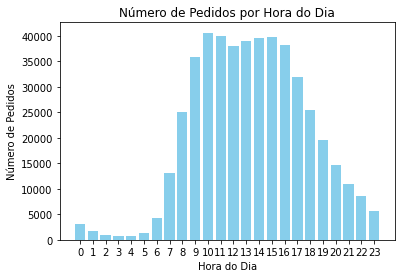

In [42]:
orders_by_hour = orders_df['order_hour_of_day'].value_counts().sort_index()

plt.bar(orders_by_hour.index, orders_by_hour.values, color='skyblue')
plt.title('Número de Pedidos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.xticks(range(24))
plt.show()

O gráfico mostra que há picos notáveis nas horas do dia em que os pedidos são mais frequentes. O pico ocorre logo de amanhã, por volta das 8:00 e se estende ate as 16:00, a demanda dura entorno de 8:00 de pico sem parar.

### [A3] Em que dia da semana as pessoas fazem compras?

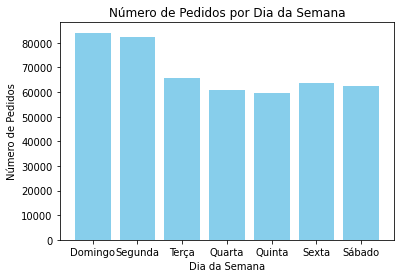

In [43]:
orders_by_dow = orders_df['order_dow'].value_counts().sort_index()


dow_mapping = {
    0: 'Domingo',
    1: 'Segunda',
    2: 'Terça',
    3: 'Quarta',
    4: 'Quinta',
    5: 'Sexta',
    6: 'Sábado'
}


orders_by_dow = orders_by_dow.rename(index=dow_mapping)
plt.bar(orders_by_dow.index, orders_by_dow.values, color='skyblue')
plt.title('Número de Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Pedidos')
plt.show()

O gráfico mostra que os dias com mais pedidos são o de domingo e segunda-feira, logo as pessoas preferem se abastecer para o restaste da semana logo no início. Pois, os dias seguintes não tem alta frequência de compras mesmo sendo alta a demanda.

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

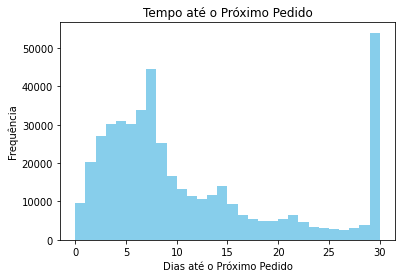

In [44]:
orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
plt.hist(orders_df['days_since_prior_order'], bins=30, color='skyblue')
plt.title('Tempo até o Próximo Pedido')
plt.xlabel('Dias até o Próximo Pedido')
plt.ylabel('Frequência')
plt.show()

 A maioria dos clientes faz o próximo pedido dentro de um curto período de tempo e isso é evidenciado pelo pico que está localizado perto do valor 7. Vemos que há uma variação nos tempos até o próximo pedido

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

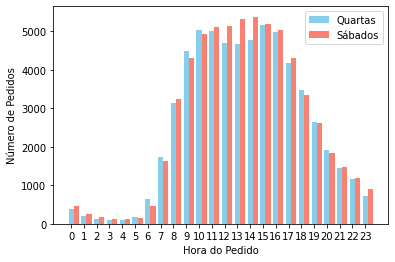

In [45]:
orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

wednesday_orders = orders_df[orders_df['order_dow'] == 3]  
saturday_orders = orders_df[orders_df['order_dow'] == 6]   


wednesday_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()

plt.bar(wednesday_counts.index, wednesday_counts.values, width=0.4, label='Quartas', color='skyblue')
plt.bar(saturday_counts.index + 0.4, saturday_counts.values, width=0.4, label='Sábados', color='salmon')
plt.xlabel('Hora do Pedido')
plt.ylabel('Número de Pedidos')
plt.xticks(range(24))
plt.legend()
plt.show()

Nas quartas-feiras, pode haver uma tendência de fazer pedidos mais cedo, talvez em preparação para o restante da semana. Nos sábados, as pessoas podem estar mais propensas a fazer pedidos ao longo do dia, sem uma concentração significativa em um determinado horário.

### [B2] Qual é a distribuição do número de pedidos por cliente?

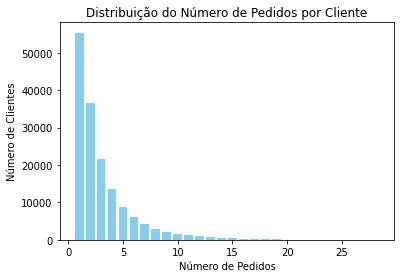

In [46]:
order_counts = orders_df['user_id'].value_counts()
frequency = order_counts.value_counts().sort_index()


plt.bar(frequency.index, frequency.values, color='skyblue')
plt.title('Distribuição do Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.show()

 A maioria dos clientes faz um número relativamente baixo de pedidos.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [47]:
combined_df = pd.merge(order_products_df, products_df, on='product_id')
reordered_products = combined_df[combined_df['reordered'] == 1]
product_reorder_counts = reordered_products[['product_name', 'product_id']].value_counts().reset_index()
product_reorder_counts.columns = ['product_name', 'product_id', 'reorder_count']
top_products = product_reorder_counts.head(20)
top_products

,product_name,product_id,reorder_count
0,banana,24852,55763
1,bag of organic bananas,13176,44450
2,organic strawberries,21137,28639
3,organic baby spinach,21903,26233
4,organic hass avocado,47209,23629
5,organic avocado,47766,18743
6,organic whole milk,27845,16251
7,large lemon,47626,15044
8,organic raspberries,27966,14748
9,strawberries,16797,13945


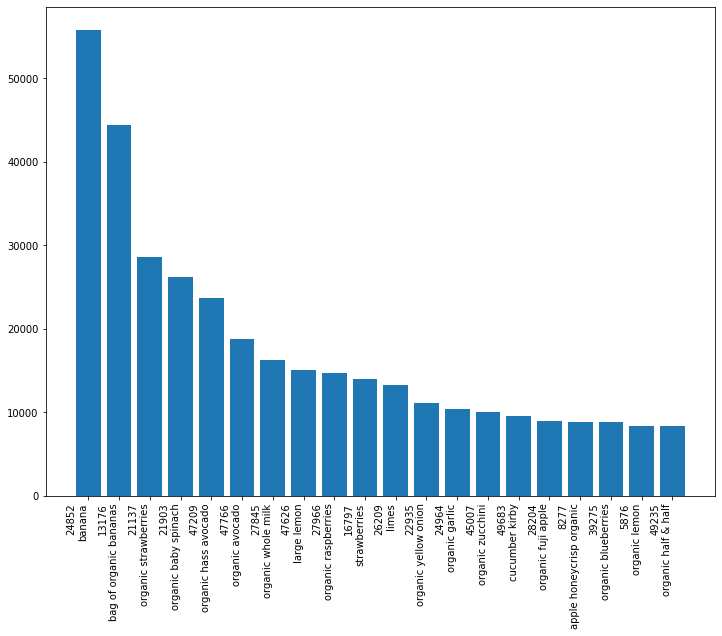

In [48]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.bar(top_products.product_id.astype(str) + '\n' + 
       top_products.product_name, 
       top_products.reorder_count)
plt.xticks(rotation=90, ha='right')
plt.show()

 Os 20 produtos mais frequentemente comprados foram identificados. 
Padrões de compra dos clientes, o comportamento de compra em diferentes dias da semana e os produtos mais populares na plataforma.

### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

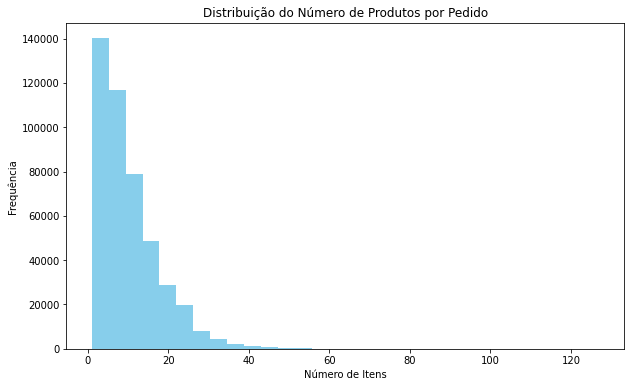

In [49]:
products_per_order = order_products_df.groupby('order_id')['product_id'].count()

plt.figure(figsize=(10, 6))
plt.hist(products_per_order, bins=30, color='skyblue')
plt.title('Distribuição do Número de Produtos por Pedido')
plt.xlabel('Número de Itens')
plt.ylabel('Frequência')
plt.show()

 A maioria dos pedidos parece ter entre 5 e 15 produtos. No entanto há uma quantidade significativa de pedidos com menos de 5 produtos, indicando em média 9.00 itens em um pedido, conforme dados fornecidos. Já a distribuição dos dados é parecida com a média, o que significa que a distribuição dos dados é bem distribuída.

### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [50]:
combined_df = pd.merge(order_products_df, products_df, on='product_id')
repeated_orders = combined_df[combined_df['reordered'] == 1]
top_repeated_products = repeated_orders['product_id'].value_counts().reset_index()
top_repeated_products.columns = ['product_id', 'frequency']
top_20_repeated_products = top_repeated_products.head(20)
top_20_product_details = products_df[products_df['product_id'].isin(top_20_repeated_products['product_id'])][['product_id', 'product_name']]
top_20_product_details

,product_id,product_name
5875,5876,organic lemon
8276,8277,apple honeycrisp organic
13175,13176,bag of organic bananas
16796,16797,strawberries
21136,21137,organic strawberries
21902,21903,organic baby spinach
22934,22935,organic yellow onion
24851,24852,banana
24963,24964,organic garlic
26208,26209,limes


 Os 20 itens mais populares e repetidos com frequência são os produtos orgânicos, o que indica uma preferência significativa pelos produtos orgânicos entre os consumidores que fazem pedidos repetidos.

# Conclusão geral do projeto:

Foram lidos 5 conjuntos de dados para uma análise contendo etapas cruciais para entender e extrair informações valiosas do conjunto de dados do Instacart.
1 Foram lidos e carregados cinco conjuntos de dados.
2 Os tipos de dados foram verificados e corrigidos.
3 Foram identificados padrões de compra em diferentes dias e horários.
4 A identificação dos produtos mais frequentemente.
Em resumo, o proporcionou uma visão, mas ampla e abrangente sobre os, comportamentos dos clientes na plataforma do Instacart

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>